In [4]:
import template_network as tempn

In [5]:
import tensorflow as tf
import numpy as np

# MNIST test

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(train, train_label), (test, test_label) = mnist.load_data()

In [8]:
train.shape, test.shape

((60000, 28, 28), (10000, 28, 28))

## Images Data

In [9]:
import matplotlib.pyplot as plt
import random

In [10]:
%matplotlib inline

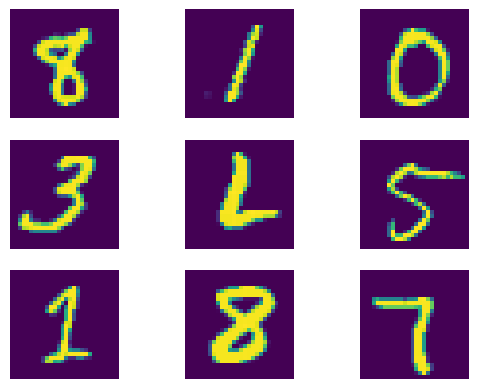

In [11]:
fig, ax = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        image = random.choice(train)
        ax[i][j].axis('off')
        ax[i][j].imshow(image)

## Data Preprocessing

In [12]:
train.shape = train.shape[0], -1
test.shape = test.shape[0], -1

In [13]:
train.shape, test.shape

((60000, 784), (10000, 784))

# Split train/dev

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, dev, train_label, dev_label = train_test_split(train, train_label, test_size=0.33 ,random_state=42)

In [16]:
train_label[0]

8

## Convert to One Hot

In [17]:
from sklearn import preprocessing
def one_hot_encoder(data):
    ohe = preprocessing.OneHotEncoder()
    data = data.reshape(-1, 1)
    ohe.fit(data)
    transformed_train = ohe.transform(data).toarray()
    return transformed_train

train_label = one_hot_encoder(train_label)
dev_label = one_hot_encoder(dev_label)

## Build Model

In [18]:
def build_model():
    model = tempn.model.MLP(
        [
            tempn.layer.FullyConnect(32, name='fisrt'),
            tempn.layer.FullyConnect(10, activation='softmax', name='output'),
        ],
        input_shape=784
    )
    model.compile(optimizer=tempn.optimizer.MomentSGD(beta=0.9), loss=tempn.loss.MeanSquaredError())
    return model

model = build_model()

## Fit data

In [19]:
train_loss, dev_loss = model.fit(train, train_label, validation=(dev, dev_label), epochs=20)

train_loss:  1.7398202084596674
dev_loss:  1.7423245467563526
train_loss:  1.7398202084596674
dev_loss:  1.7423245467563526
train_loss:  1.7398202084596674
dev_loss:  1.7423245467563098
train_loss:  1.739820208459591
dev_loss:  1.7423245467260726
train_loss:  1.7398202084051173
dev_loss:  1.7423245253903128
train_loss:  1.739820169968986
dev_loss:  1.7423094133489279
train_loss:  1.739793090556891
dev_loss:  1.7232345632898733
train_loss:  1.7216077387460977
dev_loss:  0.9083844690108331
train_loss:  0.9082316713667085
dev_loss:  0.9083844690108331
train_loss:  0.9082316713667085
dev_loss:  0.9083844690108331
train_loss:  0.9082316713667085
dev_loss:  0.9083844690108331
train_loss:  0.9082316713667083
dev_loss:  0.9083844690108331
train_loss:  0.9082316713667085
dev_loss:  0.9083844690108331
train_loss:  0.9082316713667085
dev_loss:  0.9083844690108331
train_loss:  0.9082316713667083
dev_loss:  0.9083844690108331
train_loss:  0.9082316713667085
dev_loss:  0.9083844690108331
train_loss:

In [20]:
train_loss

[1.7398202084596674,
 1.7398202084596674,
 1.7398202084596674,
 1.739820208459591,
 1.7398202084051173,
 1.739820169968986,
 1.739793090556891,
 1.7216077387460977,
 0.9082316713667085,
 0.9082316713667085,
 0.9082316713667085,
 0.9082316713667083,
 0.9082316713667085,
 0.9082316713667085,
 0.9082316713667083,
 0.9082316713667085,
 0.9082316713667085,
 0.9082316713667083,
 0.9082316713667085,
 0.9082316713667085]

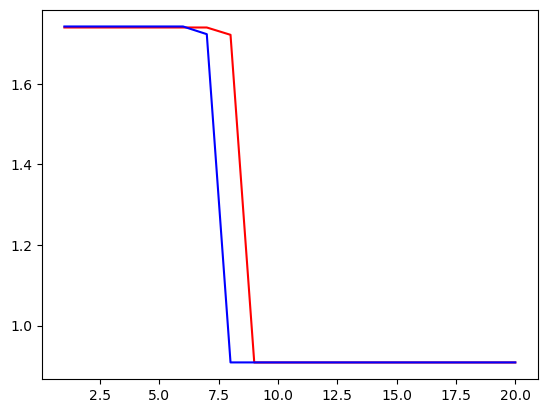

In [21]:
plt.plot(range(1, len(train_loss) + 1), train_loss, color='r')
plt.plot(range(1, len(train_loss) + 1), dev_loss, color='b')